   # 📊 Netflix Movies and TV Shows Dataset Analysis

<a id='table_of_contents'></a>

# Table of Contents
- [✨ Discovering Netflix: What’s in the Stream?](#intro) 
- [🚀 Getting Started: Importing Libraries and Data](#imports) 
- [🔍 Data Discovery: Exploring the Netflix Dataset](#data_exploration)
- [🛠️ Helper Functions: Building Analysis Tools](#functions)
- [🧼 Data Cleaning: Preparing the Dataset](#clean_data)
- [📈 Netflix Trends: Insights and Analysis](#netflix)
- [🎥 Movies vs. TV Shows: A Comparative Study](#comparsion)
- [🌟 The Final Cut: Key Insights and Conclusions](#conclusion)

<a id='intro'></a>
# ✨ Discovering Netflix: What’s in the Stream?
[Back to top](#table_of_contents)<br>

In this analysis, we explore the Netflix Movies and TV Shows dataset,<br> which contains a comprehensive list of movies and TV shows available on Netflix as of 2021.  
The dataset provides various attributes such as:  
- **Title:** Name of the movie or TV show  
- **Director and Cast:** Key people involved in the production  
- **Country:** Origin of the content  
- **Date Added:** When the content was made available on Netflix  
- **Release Year:** Year of release  
- **Rating:** Content rating (e.g., TV-MA, PG-13)  
- **Duration:** Length of the movie or number of seasons for TV shows  
- **Listed In:** Categories or genres associated with the content  
- **Description:** A brief synopsis or summary  

The goal of this analysis is to:  
1. Understand the structure and composition of the dataset.  
2. Perform data cleaning and preprocessing.  
3. Analyze the data to find patterns and insights. 
4. Visualize key trends related to movie and TV show attributes.  
5. Compare characteristics between movies and TV shows.  

Let's begin by importing the necessary libraries and loading the dataset.  


<a id='imports'></a>
# 🚀 Getting Started: Importing Libraries and Data
[Back to top](#table_of_contents)

#### Imports the necessary libraries for data analysis and visualization
- `pandas` for data manipulation and analysis.
- `matplotlib.pyplot` for creating plots.
- `seaborn` for enhanced data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import color_palette

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# 🔍 Data Discovery: Exploring the Netflix Dataset
[Back to top](#table_of_contents)

#### Dataset Dimensions  
We check the dimensions of the dataset using `shape`, which returns the number of rows and columns.  
- The dataset contains **8,807 rows** and **12 columns**, representing various attributes of Netflix movies and TV shows.  


In [3]:
netflix_df.shape

(8807, 12)

#### Display Random Sample
Displays a random sample of 5 rows from the `netflix_df` DataFrame to provide a quick overview of the dataset's structure and content.

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
680,s681,TV Show,The Last Dance,NaN,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,"June 19, 2021",2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...
3030,s3031,TV Show,The Healing Powers of Dude,NaN,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",NaN,"January 13, 2020",2020,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas",When an 11-year-old boy with social anxiety di...
3838,s3839,TV Show,The Mechanism,NaN,"Selton Mello, Caroline Abras, Enrique Diaz, An...",Brazil,"May 10, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A scandal erupts in Brazil during an investiga...
6311,s6312,Movie,Billy Elliot,Stephen Daldry,"Jamie Bell, Gary Lewis, Stuart Wells, Billy Fa...","United Kingdom, France","February 1, 2019",2000,R,110 min,"Dramas, Independent Movies, International Movies",When a boy trades boxing school for ballet les...
1739,s1740,Movie,Christmas with a Prince,Justin G. Dyck,"Kaitlyn Leeb, Nick Hounslow, Josh Dean, Melind...",Canada,"November 4, 2020",2018,TV-PG,86 min,"Comedies, Dramas, Romantic Movies",A dedicated pediatrician reconsiders her feeli...


#### Checking for Missing Values  
We check for missing values in the dataset to identify any columns that may need cleaning or imputation.  


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Inspecting Data Types  
We check the data types of each column to ensure correct data handling during analysis.  

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Statistical Summary of Numeric Columns  
We use `describe()` to generate a statistical summary of the numeric columns, including count, mean, and quartiles.  


In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='functions'></a>
# 🛠️ Helper Functions: Building Analysis Tools
[Back to top](#table_of_contents)

#### We define a few reusable functions to simplification our data analysis and visualization:  
- `split_and_count()`: Splits a specified column by a delimiter and counts the occurrences of each item.  

In [8]:
def split_and_count(df,name,value):
    result = df[name].str.lower().str.split(', ').explode().str.strip().value_counts().head(value)
    return result

- `add_plot_labels()`: Adds titles and labels to plots for better visualization.  

In [9]:
def add_plot_labels(title,xlable,ylable,legend,grid):
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel(ylable, fontsize=12)
    plt.legend(title=legend)
    if grid:
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

- `plot_bar_chart()`: Plots a bar chart with customizable size, colors, and labels. 

In [10]:
def plot_bar_chart(x_size,y_size,df,p,title,xlable,ylable):
    plt.figure(figsize=(x_size, y_size))
    sns.barplot(x=df.index, y=df.values, palette=p)
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel(xlable,fontsize=12)
    plt.ylabel(ylable,fontsize=12)
    plt.show()

- `compare_two_bar_charts()`: Plots two bar charts side by side for easy comparison between two datasets.  

In [11]:
def compare_two_bar_charts(x1,y1,x2,y2,p1,p2,movie_title,tv_show_title):
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1)
    ax[0].set_title(movie_title,fontsize=14, fontweight='bold')
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2)
    ax[1].set_title(tv_show_title,fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

<a id='clean_data'></a>
# 🧼 Data Cleaning: Preparing the Dataset
[Back to top](#table_of_contents)

#### Cleaning the duration Column  
- Drop rows with missing **duration** values. 
- Convert **movie durations** from strings to numeric values (in minutes).  
- Separate **movies** and **TV shows** for further analysis.  

In [12]:
netflix_df = netflix_df.dropna(subset=['duration'])
movie_mask = netflix_df['type'] == 'Movie'

netflix_df.loc[movie_mask, 'duration'] = (
    netflix_df.loc[movie_mask, 'duration']
    .astype(str)
    .str.extract('(\d+)')[0] 
)

netflix_df.loc[movie_mask, 'duration'] = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

tv_shows = netflix_df[netflix_df["type"]=="TV Show"].copy()
movies = netflix_df[netflix_df["type"]=="Movie"] .copy()

#### Plot Average Movie Duration by Year
- Calculates the **average** movie duration per release year.
- Plots a line graph to show trends in average movie duration over time.
- Uses the `add_plot_labels()` function to add title, labels, and grid.
- Displays the plot to visualize changes in movie lengths.

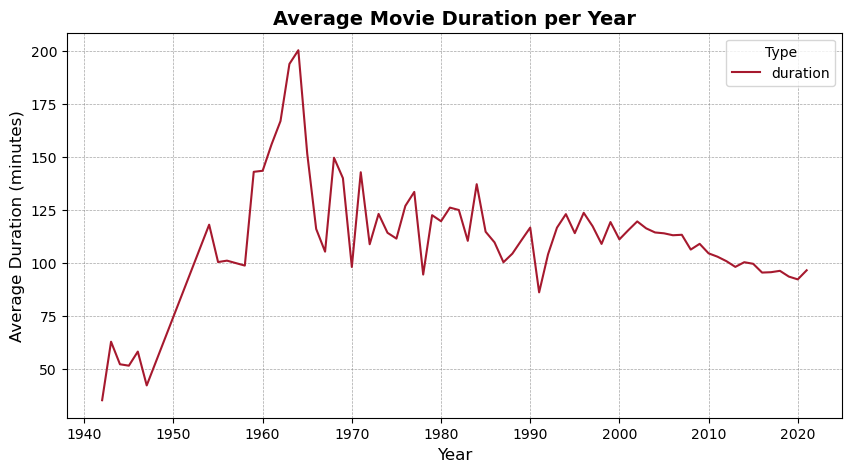

In [13]:
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().sort_index()
plt.figure(figsize=(10, 5))
avg_duration_per_year.plot(color='#A6192E')
add_plot_labels('Average Movie Duration per Year','Year','Average Duration (minutes)','Type',True)
plt.show()

#### Scatter Plot of Long and Short Movies
- Filters movies with durations ≥ 210 minutes (long) and < 30 minutes (short).
- Creates a scatter plot to show the **release years** and **durations** of long and short movies.
- Uses different colors for long and short movies and adds labels using `add_plot_labels`.
- Displays the plot to highlight outliers in movie durations.

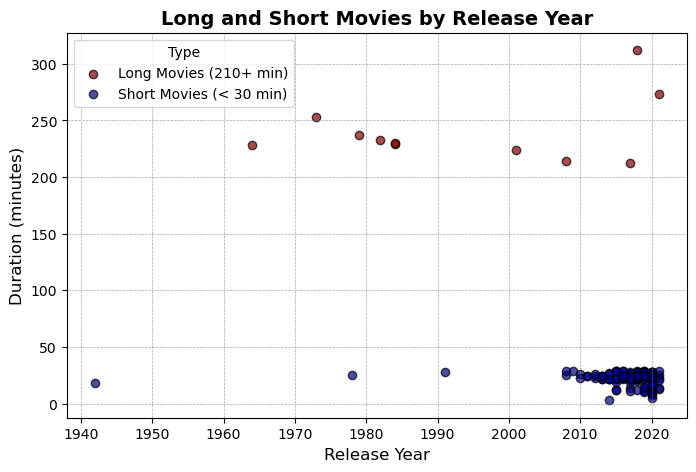

In [14]:
long_movies = movies[movies['duration'] >= 210]
short_movies = movies[movies['duration'] < 30] 

plt.figure(figsize=(8, 5))

plt.scatter(long_movies['release_year'], long_movies['duration'], 
            color='darkred', alpha=0.7, edgecolor='black', label='Long Movies (210+ min)')

plt.scatter(short_movies['release_year'], short_movies['duration'], 
            color='darkblue', alpha=0.7, edgecolor='black', label='Short Movies (< 30 min)')  

add_plot_labels('Long and Short Movies by Release Year','Release Year','Duration (minutes)','Type',True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Identify Longest Movies
- Filters movies with durations > 300 minutes to identify the longest movies.
- Displays the details of these movies, including titles and other attributes.
- Reveals that ***Black Mirror: Bandersnatch*** is among the longest with a duration of **312** minutes.

In [15]:
longest_movie = long_movies[long_movies['duration'] > 300]
longest_movie 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


#### Adjust Movie Durations and Types
- Converts movie durations to numeric values, handling errors.
- Sets durations > 300 minutes to 90 minutes to correct outliers.
- Reclassifies movies with durations < 30 minutes as **Short Movie**.
- Updates the **movies** and **short_movies** DataFrames based on the new classifications.

In [16]:
numeric_mask = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

netflix_df.loc[movie_mask & (numeric_mask > 300), 'duration'] = 90
netflix_df.loc[movie_mask & (numeric_mask < 30), 'type'] = "Short Movie"

movies = netflix_df[netflix_df["type"] == "Movie"].copy()
short_movies = netflix_df[netflix_df["type"] == "Short Movie"].copy()

<a id='netflix'></a>
# 📈 Netflix Trends: Insights and Analysis
[Back to top](#table_of_contents)

#### Analyze Top 5 Genres Over Time
- Creates a DataFrame with release years and genres, splitting multi-genre entries.
- Counts genre occurrences per year and selects the top 5 genres by total count.
- Plots a line graph to show the trend of these genres over time.
- Uses `add_plot_labels()` to enhance the plot and displays it to visualize genre popularity.

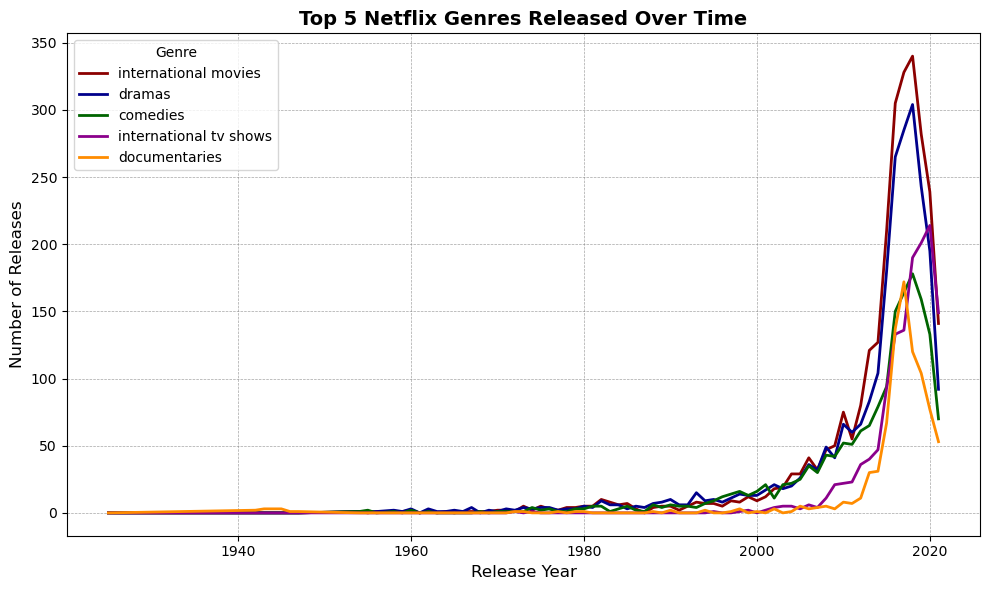

In [17]:
palette = ["darkred","darkblue","darkgreen","darkmagenta","darkorange"]
genre_year_df = netflix_df[['release_year', 'listed_in']].copy()
genre_year_df = genre_year_df.assign(
    genre=genre_year_df['listed_in'].str.split(',')
).explode('genre')

genre_year_df['genre'] = genre_year_df['genre'].str.strip().str.lower()
genre_counts = genre_year_df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)
top_genres = genre_counts.sum().sort_values(ascending=False).head(5)

genre_counts[top_genres.index].plot(figsize=(10, 6), linewidth=2,color=palette)
add_plot_labels("Top 5 Netflix Genres Released Over Time","Release Year","Number of Releases","Genre",True)
plt.tight_layout()
plt.show()

#### Pie Chart of Top 5 Ratings
- Identifies the top 5 ratings by count and groups the rest as **Others**.
- Creates a pie chart to show the distribution of ratings.
- Adds percentage labels and a title to the pie chart.
- Displays the plot to visualize the proportion of each rating category.

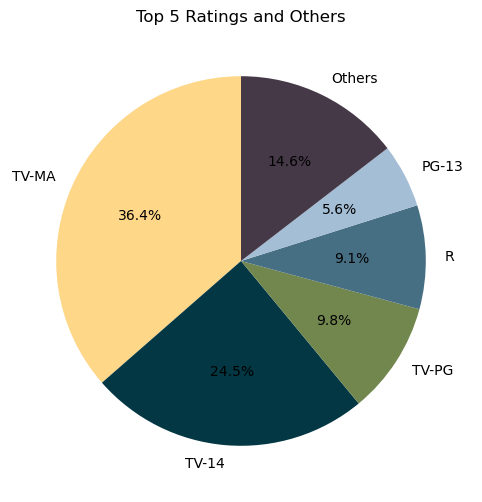

In [18]:
color = ["#FED789FF", "#023743FF", "#72874EFF", "#476F84FF", "#A4BED5FF", "#453947FF"]
top_5_ratings = netflix_df['rating'].value_counts().head(5)
others_count = netflix_df['rating'].value_counts().sum() - top_5_ratings.sum()
top_5_ratings_with_others = pd.concat([top_5_ratings, pd.Series({'Others': others_count})])
plt.figure(figsize=(10, 6))
plt.pie(top_5_ratings_with_others, labels=top_5_ratings_with_others.index, autopct='%1.1f%%', startangle=90,
       colors=color)
plt.title('Top 5 Ratings and Others')
plt.show()

#### Bar Chart of TV Show Seasons
- Counts the number of TV shows by season count (duration).
- Uses the `plot_bar_chart()` function to create a bar chart showing the distribution of seasons.
- Displays the plot to highlight how many seasons TV shows typically have.

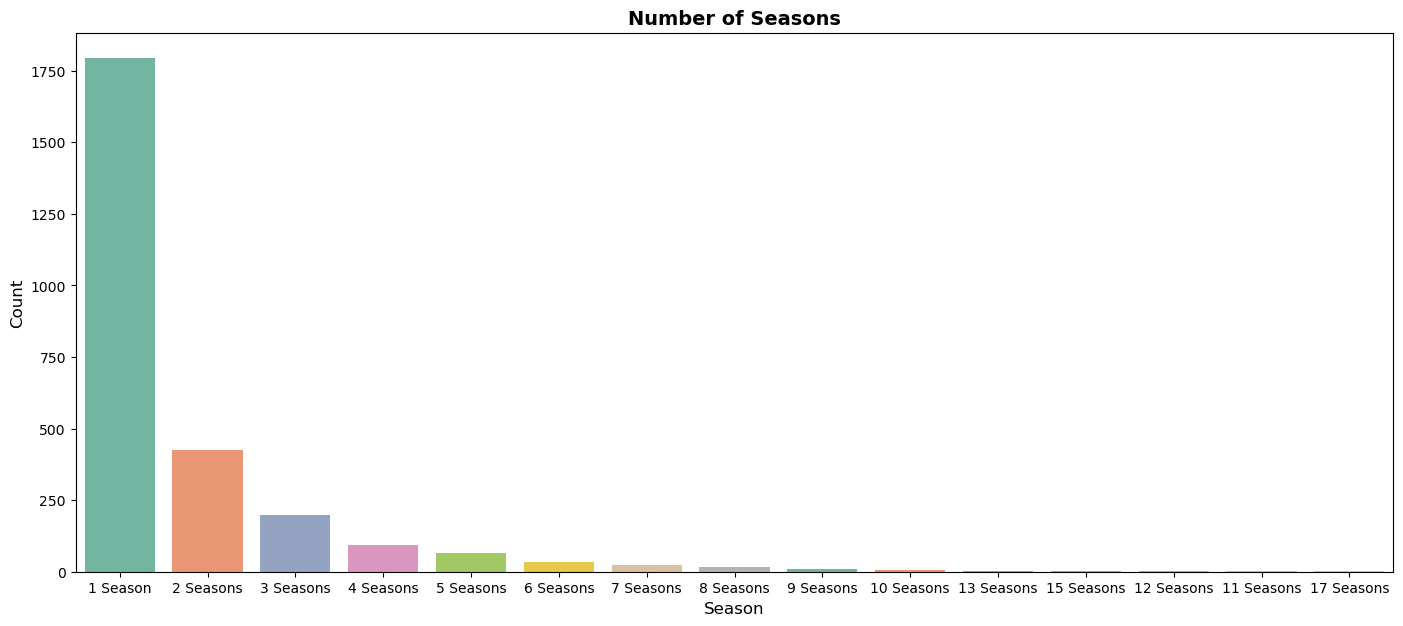

In [19]:
tv_show_seasons = tv_shows['duration'].value_counts()
plot_bar_chart(17,7,tv_show_seasons,'Set2','Number of Seasons','Season','Count')

#### Stacked Bar Chart of Ratings by Year
- Groups the data by release year and rating, counting occurrences.
- Filters for years after 1999.
- Creates a stacked bar chart to show the distribution of ratings from 2000 to 2021.
- Uses `add_plot_labels()` to add title, labels, and grid, and displays the plot.

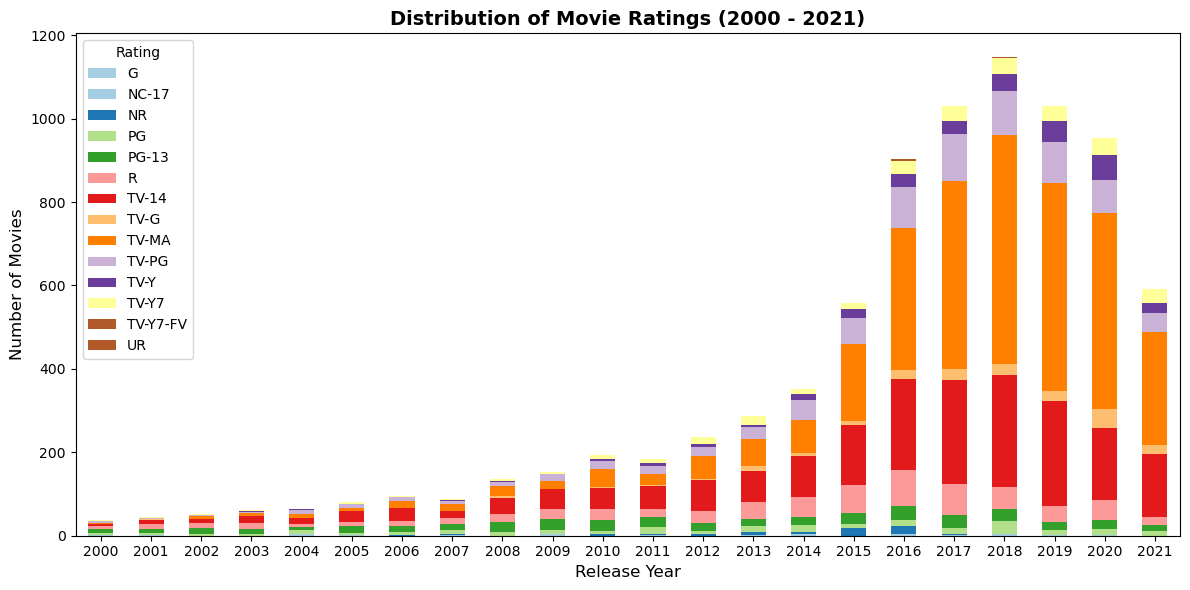

In [20]:
rating_per_year = netflix_df.groupby('release_year')['rating'].value_counts().unstack(fill_value=0)
rating_per_year = rating_per_year[rating_per_year.index > 1999]
rating_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
add_plot_labels('Distribution of Movie Ratings (2000 - 2021)','Release Year','Number of Movies','Rating',False)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

<a id='comparsion'></a>
# 🎥 Movies vs. TV Shows: A Comparative Study
[Back to top](#table_of_contents)

#### Bar Chart of Movies vs TV Shows
- Counts the number of entries by type (Movie, TV Show, Short Movie).
- Uses the `plot_bar_chart()` function to create a bar chart comparing the counts.
- Displays the plot to show the relative proportion of movies and TV shows in the dataset.

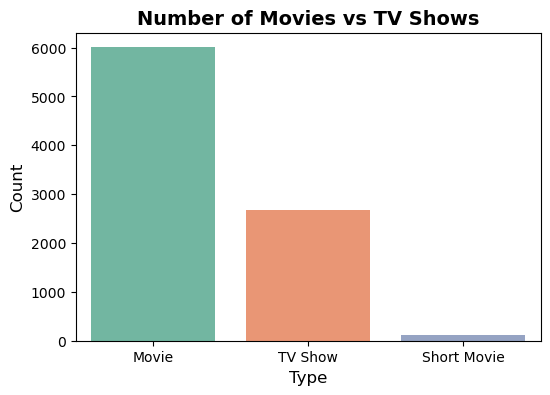

In [21]:
type_counts = netflix_df['type'].value_counts()
plot_bar_chart(6,4,type_counts,'Set2','Number of Movies vs TV Shows','Type','Count')

#### Plot Movies and TV Shows Released Over Time
- Groups the data by release year and type, counting occurrences.
- Plots a line graph to show the number of movies, TV shows, and short movies released each year.
- Uses different colors for each type and adds labels using `add_plot_labels()`.
- Displays the plot to visualize trends in content production over time.

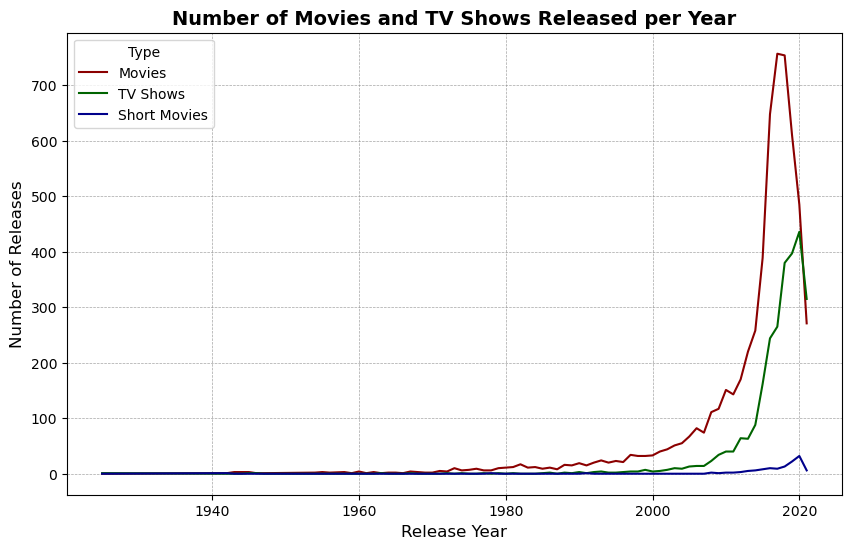

In [22]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='darkred', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='darkgreen', label='TV Shows')
plt.plot(content_counts.index, content_counts['Short Movie'], linestyle='-', color='darkblue', label='Short Movies')
add_plot_labels('Number of Movies and TV Shows Released per Year','Release Year','Number of Releases',"Type",True)
plt.show()

#### Compare Top 10 Movie and TV Show Genres
- Uses the `split_and_count()` function to get the top 10 genres for movies and TV shows.
- Uses the `compare_two_bar_charts()` function to create side-by-side bar charts comparing genre counts.
- Displays the plots to highlight differences in genre popularity between movies and TV shows.

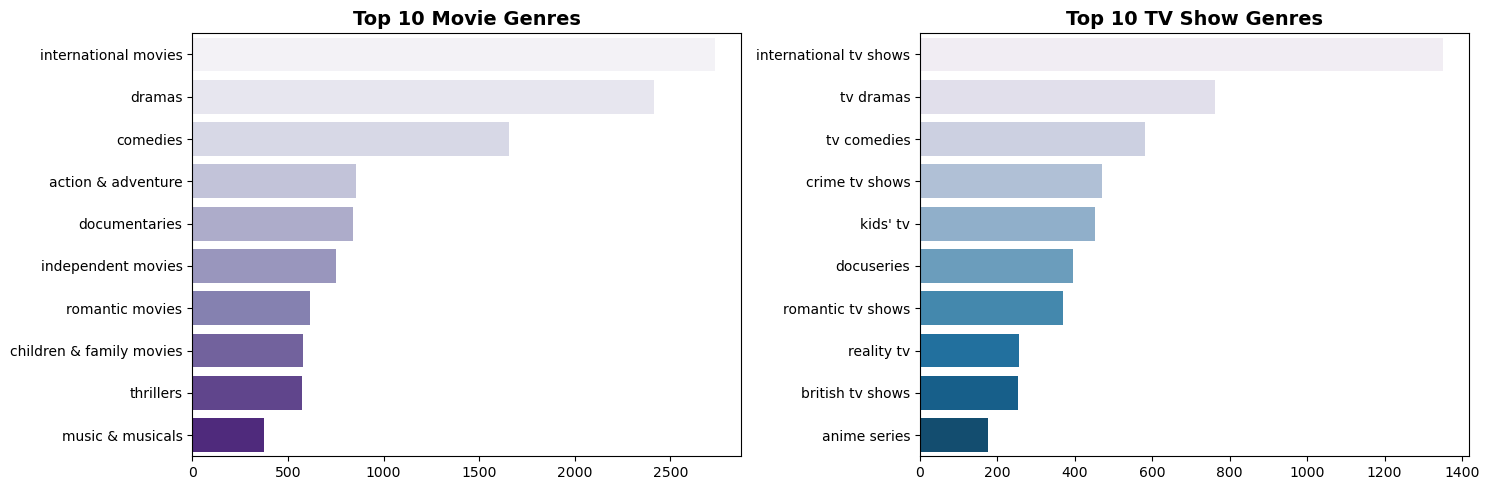

In [23]:
movie_genres = split_and_count(movies,'listed_in',10)
tv_show_genres = split_and_count(tv_shows,'listed_in',10)
compare_two_bar_charts(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,
       'Purples','PuBu','Top 10 Movie Genres','Top 10 TV Show Genres')

#### Compare Top 10 Countries for Movies and TV Shows
- Uses the `split_and_count()` function to get the top 10 countries for movies and TV shows.
- Uses the `compare_two_bar_charts()` function to create side-by-side bar charts comparing country counts.
- Displays the plots to show which countries produce the most movies and TV shows.

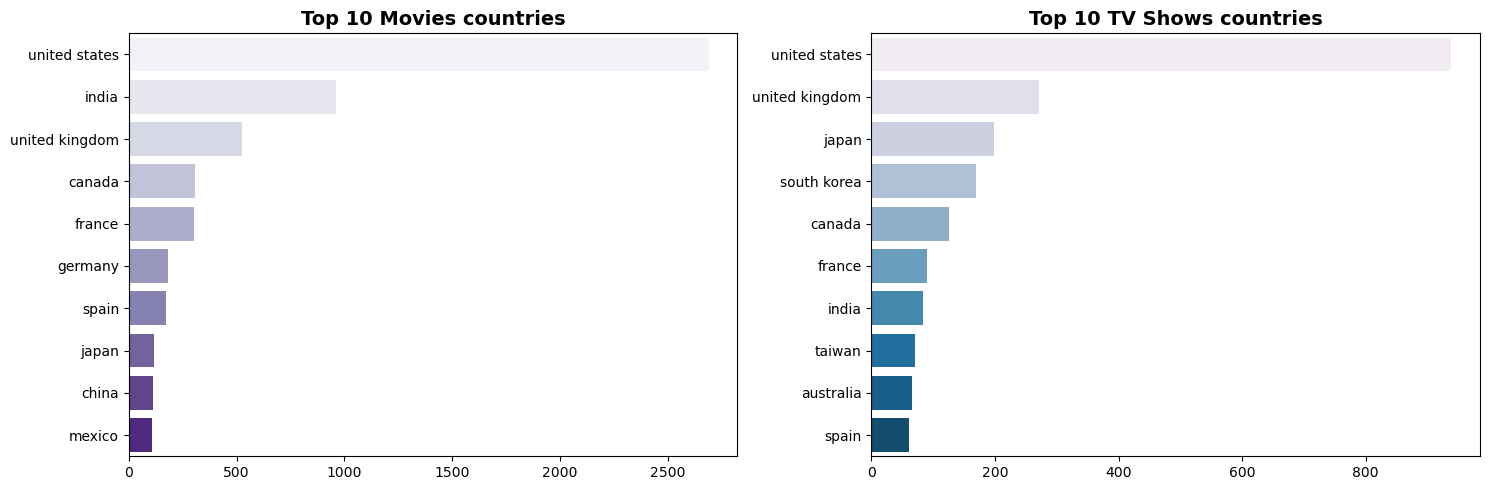

In [24]:
movie_countries = split_and_count(movies,'country',10)
tv_show_countries = split_and_count(tv_shows,'country',10)
compare_two_bar_charts(movie_countries.values,movie_countries.index,tv_show_countries.values,tv_show_countries.index,
       'Purples','PuBu','Top 10 Movies countries','Top 10 TV Shows countries')

#### Compare Top 5 Actors in Movies and TV Shows
- Uses the `split_and_count()` function to get the top 5 actors for movies and TV shows.
- Uses the `compare_two_bar_charts()` function to create side-by-side bar charts comparing actor counts.
- Displays the plots to highlight the most frequent actors in movies versus TV shows.

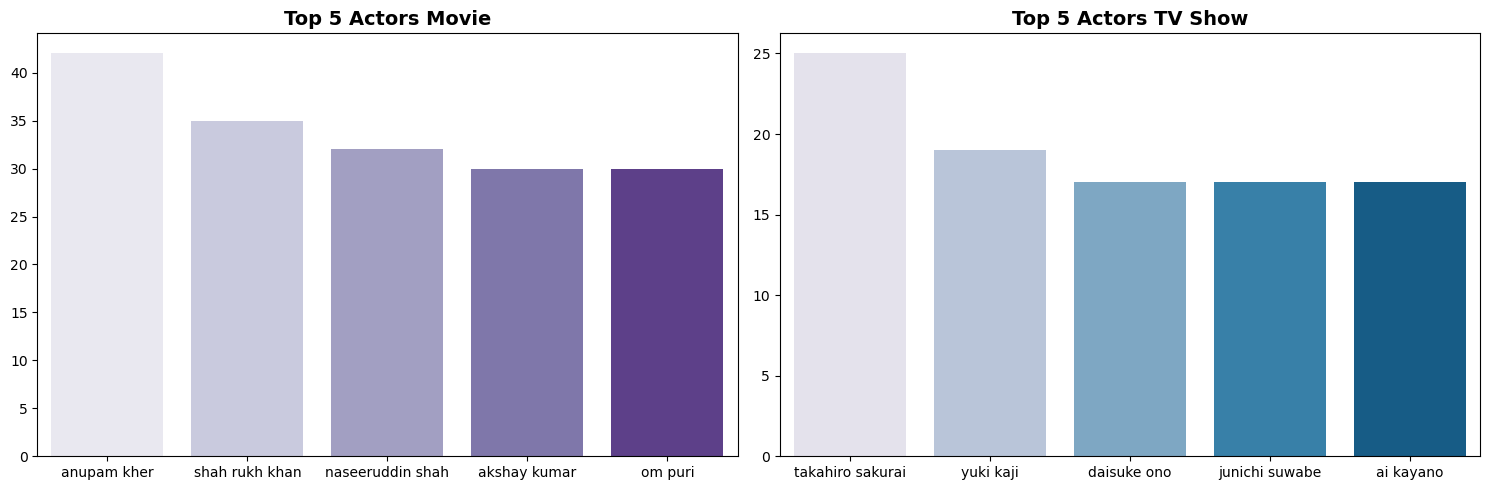

In [25]:
colors=["#D57A6DFF", "#E8B762FF", "#9CCDDFFF", "#525052FF"]
movie_actors = split_and_count(movies,'cast',5)
tv_show_actors = split_and_count(tv_shows,'cast',5)
compare_two_bar_charts(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,
       'Purples','PuBu','Top 5 Actors Movie','Top 5 Actors TV Show')

<a id='conclusion'></a>
# 📊 Conclusion 
[Back to top](#table_of_contents)

### 🔍 Key Insights and Findings  
Through our analysis of the Netflix Movies and TV Shows dataset, we discovered several interesting patterns and trends:  

#### 1. 🆚 Movies vs. TV Shows  
- **Dominance of Movies:** Movies make up a significantly larger part of the dataset compared to TV shows.  
- **Changing Trend**: The gap is getting smaller over time, showing that Netflix is adding more TV shows lately. 

#### 2. 🎭 Genre Analysis  
- **Most Popular Movie Genres:** The top genres for movies are **Dramas**, **Comedies**, and **Documentaries**.  
- **Most Popular TV Show Genres:** The most popular TV show genres are **International TV Shows**, **Dramas**, and **Reality TV**.  
- **Genre Evolution:** Some genres have become more popular in recent years, showing how Netflix’s content is changing..  

#### 3. 🔞 Content Ratings  
- **Movie Ratings:** The most common movie ratings are **TV-MA**, **TV-14**, and **R**, This shows that a lot of the content is made for adults.
- **TV Show Ratings:** TV shows, on the other hand, often have family-friendly ratings such as **TV-PG** and **TV-Y7**, made for more types of viewers.
- **Rating Patterns:** The different ratings show that Netflix tries to offer content for both adults and kids.

#### 4. ⏳ Duration Analysis 
- **Movies:** Movie lengths have mostly stayed the same, with a few very long ones.
- **TV Shows:** Most shows have just one or two seasons, showing a trend toward limited series.
- **Short and Long Content:** Netflix’s library includes both very short and long content, appealing to different viewing preferences.  

#### 5. 🌍 Country of Origin  
- **Global Content Origins:** The majority of the content originates from the **United States**, followed by **India**, **United Kingdom**, and **Japan**.  
- **Global Expansion:** The variety of content from different countries shows Netflix's dedication to global diversity.
#### 6. 🎭 Top Actors  
- **Regular Appearances:** Some actors appear often in both movies and TV shows, showing they work together a lot and are popular. 
- **Multi-Platform Presence:** Some actors are well-known in both movies and TV shows, showing they are versatile and widely liked..  

---

### 🌟 Final Thoughts  
Our analysis offers key insights into Netflix's content library. It shows that: 
- Netflix has added more TV shows in recent years. 
- The platform continues to offer a mix of mature and family-friendly content for a wide audience. 
- nternational content is growing, highlighting Netflix's global strategy.